In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# load the Health Insurance dataset 

F_Detection= pd.read_csv(r"C:\Users\srija\Downloads\PS_20174392719_1491204439457_log.csv", header=0)

# Copy to back-up file

F_Detection_BK =  F_Detection.copy()

# Display the first 5 records

F_Detection.head(8)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0


In [3]:
F_Detection.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
F_Detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
F_Detection.shape

(6362620, 11)

In [6]:
F_Detection_dup = F_Detection[F_Detection.duplicated(keep='last')]
# Display the duplicate recor
F_Detection_dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [7]:
F_Detection.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
F_Detection.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


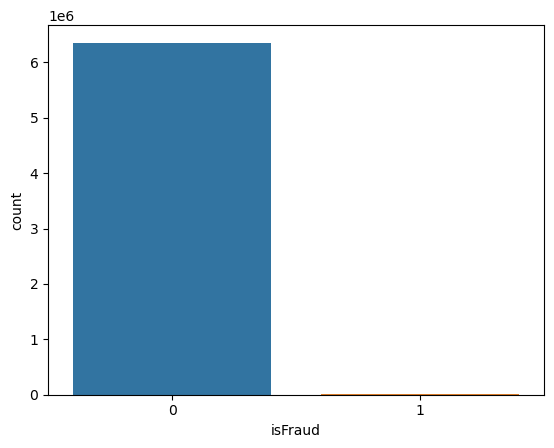

In [9]:
a=F_Detection['isFraud'].value_counts()
ax=sns.countplot(x='isFraud',data=F_Detection)
print(a)

In [10]:
100 * (8213/float(F_Detection.shape[0]))

0.12908204481801522

In [11]:
100 * (6354407/float(F_Detection.shape[0]))

99.87091795518198

In [12]:
F_Detection['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [13]:
F_Detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


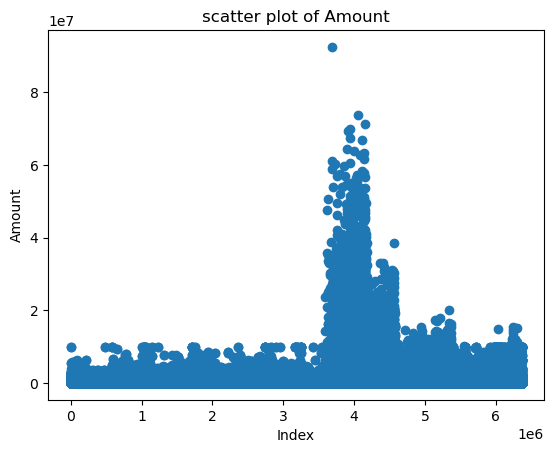

In [14]:
#Scatter plot for outliers 
plt.scatter(F_Detection.index,F_Detection['amount'])
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('scatter plot of Amount')
plt.show()

# UNDER SAMPLING

In [15]:
min_len=len(F_Detection[F_Detection['isFraud']==1])
print(min_len)

8213


In [16]:
maj_idx=F_Detection[F_Detection['isFraud']==0].index
print(maj_idx)

Index([      0,       1,       4,       5,       6,       7,       8,       9,
            10,      11,
       ...
       6362314, 6362315, 6362316, 6362317, 6362318, 6362319, 6362320, 6362321,
       6362322, 6362323],
      dtype='int64', length=6354407)


In [17]:
random_maj_idx=np.random.choice(maj_idx,min_len,replace=False)
print(len(random_maj_idx))

8213


In [18]:
min_idx=F_Detection[F_Detection['isFraud']==1].index
print(min_idx)

Index([      2,       3,     251,     252,     680,     681,     724,     969,
           970,    1115,
       ...
       6362610, 6362611, 6362612, 6362613, 6362614, 6362615, 6362616, 6362617,
       6362618, 6362619],
      dtype='int64', length=8213)


In [19]:
under_sampling_idx=np.concatenate([min_idx,random_maj_idx])

In [20]:
under_sample=F_Detection.loc[under_sampling_idx]

<Axes: xlabel='isFraud', ylabel='count'>

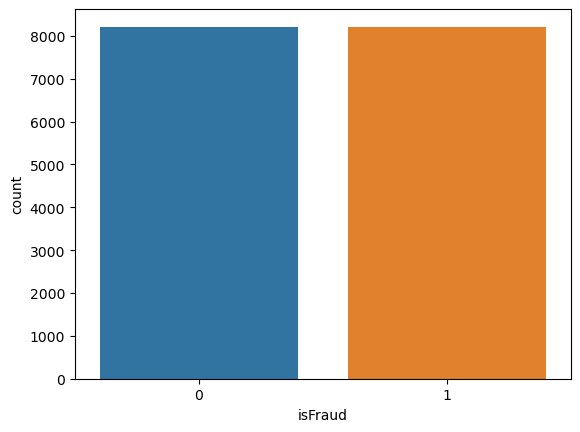

In [21]:
sns.countplot(x='isFraud',data=under_sample)

In [22]:
isFraud_UL=round(under_sample.isFraud.mean()+3*under_sample.isFraud.std(),3)
isFraud_LL=round(under_sample.isFraud.mean()-3*under_sample.isFraud.std(),3)
under_sample_new=under_sample[(under_sample.isFraud>isFraud_LL)&(under_sample.isFraud<isFraud_UL)]
under_sample_BK2=under_sample.copy()
under_sample_new.shape

(16426, 11)

In [23]:
#count the target or dependent variable by 0,1 and their proportion
#(>=10:1,then the dataset is imbalance data)
isFraud_count=under_sample_new.isFraud.value_counts()
print("Class 0:",isFraud_count[0])
print("Class 1:",isFraud_count[1])
print("Proportion:",round(isFraud_count[0]/isFraud_count[1],2),':1')
print('Total Fraud Detection Records:',len(under_sample_new))

Class 0: 8213
Class 1: 8213
Proportion: 1.0 :1
Total Fraud Detection Records: 16426


In [24]:
under_sample_new.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
under_sample_new=under_sample_new.drop(['nameOrig','newbalanceOrig',
       'nameDest','newbalanceDest','isFlaggedFraud'],axis=1)

In [28]:
under_sample_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'], dtype='object')

In [30]:
under_sample_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6075512
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   isFraud         16426 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 898.3+ KB


In [26]:
under_sample_new['type'].value_counts()

type
CASH_OUT    6981
TRANSFER    4777
PAYMENT     2770
CASH_IN     1847
DEBIT         51
Name: count, dtype: int64

In [31]:
under_sample_new['type']=under_sample_new['type'].map({'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4})
under_sample_new

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
2,1,3,181.00,181.00,0.00,1
3,1,0,181.00,181.00,21182.00,1
251,1,3,2806.00,2806.00,0.00,1
252,1,0,2806.00,2806.00,26202.00,1
680,1,3,20128.00,20128.00,0.00,1
...,...,...,...,...,...,...
6192294,571,1,1515.45,195113.93,0.00,0
5933355,404,0,129325.60,399530.00,62945.36,0
4888656,349,1,3267.80,0.00,0.00,0
3079989,235,0,95077.23,3577.20,317212.22,0


Text(0.5, 1.0, 'Correlation On\xa0Fraud\xa0Classes')

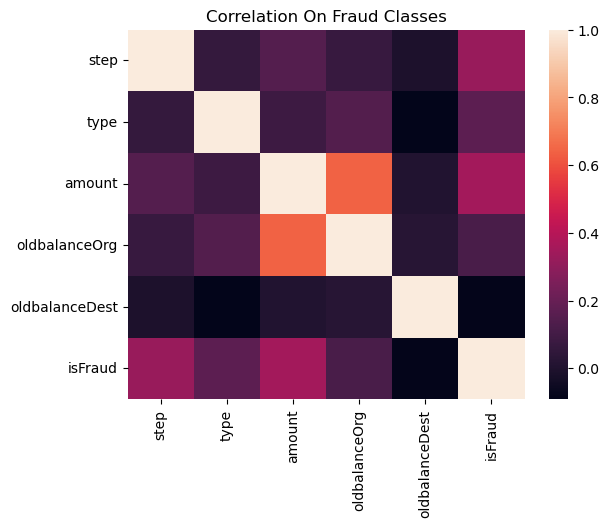

In [67]:
plt.figure(1)
sns.heatmap(under_sample_new.corr())
plt.title('Correlation On Fraud Classes')

In [32]:
under_sample_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6075512
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   isFraud         16426 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 898.3 KB


In [33]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in under_sample_new.columns:
    if col != 'isFraud':
        IndepVar.append(col)

TargetVar = 'isFraud'

x = under_sample_new[IndepVar]
y = under_sample_new[TargetVar]

In [34]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11498, 5), (4928, 5), (11498,), (4928,))

In [35]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# KNN CLASSIFIER

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[2305  174]
 [ 206 2243]]
Outcome values : 
 2305 174 206 2243
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.93      0.92      2479
           0       0.93      0.92      0.92      2449

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928

Accuracy : 92.3 %
Precision : 91.8 %
Recall : 93.0 %
F1 Score : 0.924
Specificity or True Negative Rate : 91.6 %
Balanced Accuracy : 92.3 %
MCC : 0.846
roc_auc_score: 0.923


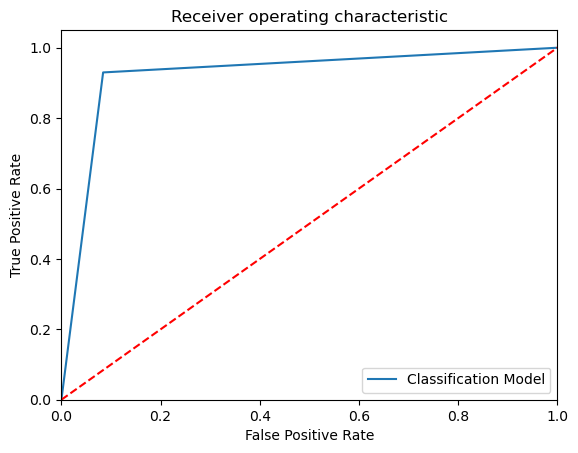

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[2212  267]
 [  89 2360]]
Outcome values : 
 2212 267 89 2360
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.89      0.93      2479
           0       0.90      0.96      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.8 %
Precision : 96.1 %
Recall : 89.2 %
F1 Score : 0.926
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 92.8 %
MCC : 0.858
roc_auc_score: 0.928


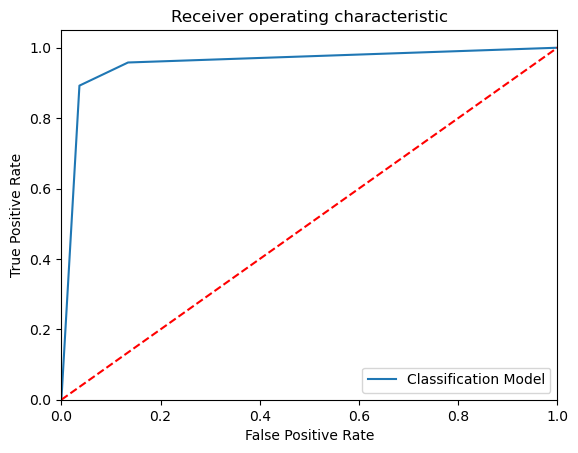

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[2295  184]
 [ 173 2276]]
Outcome values : 
 2295 184 173 2276
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93      2479
           0       0.93      0.93      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.8 %
Precision : 93.0 %
Recall : 92.6 %
F1 Score : 0.928
Specificity or True Negative Rate : 92.9 %
Balanced Accuracy : 92.8 %
MCC : 0.855
roc_auc_score: 0.928


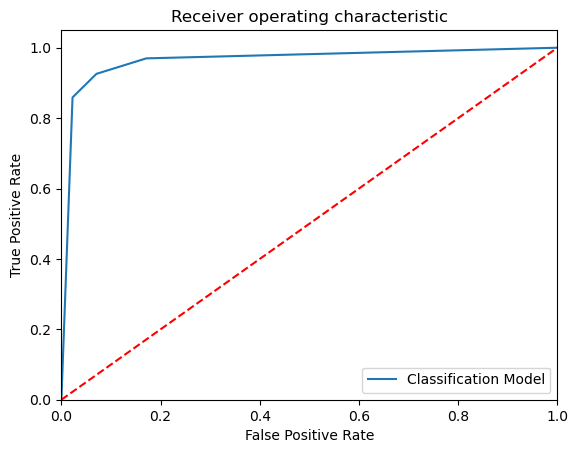

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[2229  250]
 [ 110 2339]]
Outcome values : 
 2229 250 110 2339
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.93      2479
           0       0.90      0.96      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.7 %
Precision : 95.3 %
Recall : 89.9 %
F1 Score : 0.925
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 92.7 %
MCC : 0.855
roc_auc_score: 0.927


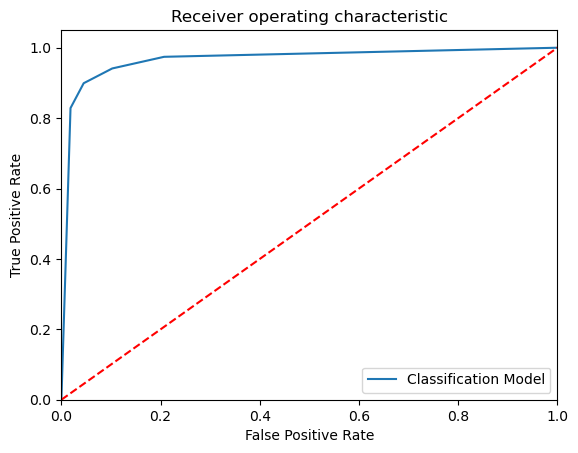

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[2280  199]
 [ 169 2280]]
Outcome values : 
 2280 199 169 2280
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.92      0.93      2479
           0       0.92      0.93      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.5 %
Precision : 93.1 %
Recall : 92.0 %
F1 Score : 0.925
Specificity or True Negative Rate : 93.1 %
Balanced Accuracy : 92.6 %
MCC : 0.851
roc_auc_score: 0.925


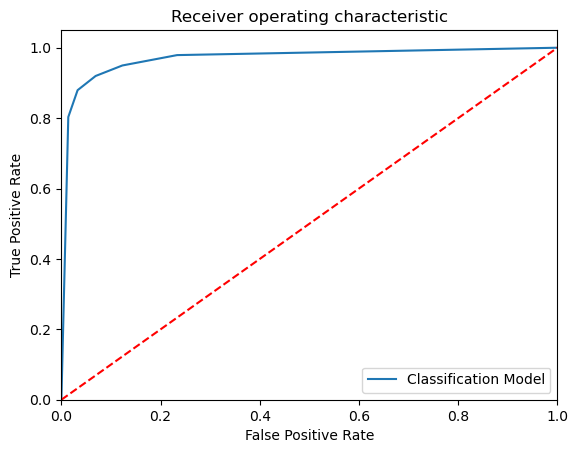

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[2236  243]
 [ 127 2322]]
Outcome values : 
 2236 243 127 2322
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.92      2479
           0       0.91      0.95      0.93      2449

    accuracy                           0.92      4928
   macro avg       0.93      0.93      0.92      4928
weighted avg       0.93      0.92      0.92      4928

Accuracy : 92.5 %
Precision : 94.6 %
Recall : 90.2 %
F1 Score : 0.924
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 92.5 %
MCC : 0.851
roc_auc_score: 0.925


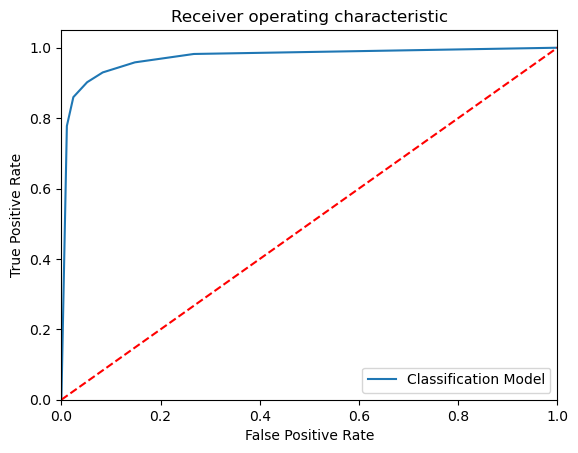

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[2276  203]
 [ 158 2291]]
Outcome values : 
 2276 203 158 2291
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.92      0.93      2479
           0       0.92      0.94      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.7 %
Precision : 93.5 %
Recall : 91.8 %
F1 Score : 0.927
Specificity or True Negative Rate : 93.5 %
Balanced Accuracy : 92.7 %
MCC : 0.854
roc_auc_score: 0.927


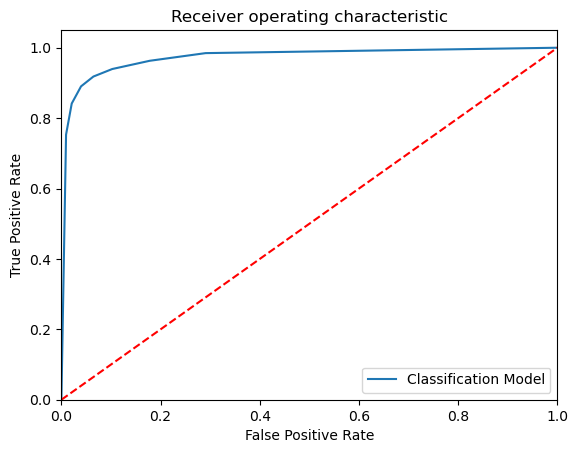

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[2238  241]
 [ 128 2321]]
Outcome values : 
 2238 241 128 2321
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.90      0.92      2479
           0       0.91      0.95      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.5 %
Precision : 94.6 %
Recall : 90.3 %
F1 Score : 0.924
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 92.6 %
MCC : 0.851
roc_auc_score: 0.925


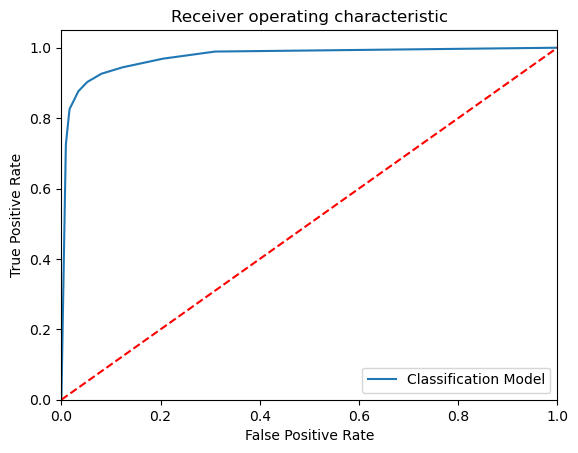

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[2261  218]
 [ 153 2296]]
Outcome values : 
 2261 218 153 2296
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.91      0.92      2479
           0       0.91      0.94      0.93      2449

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.93      0.92      0.92      4928

Accuracy : 92.5 %
Precision : 93.7 %
Recall : 91.2 %
F1 Score : 0.924
Specificity or True Negative Rate : 93.8 %
Balanced Accuracy : 92.5 %
MCC : 0.85
roc_auc_score: 0.925


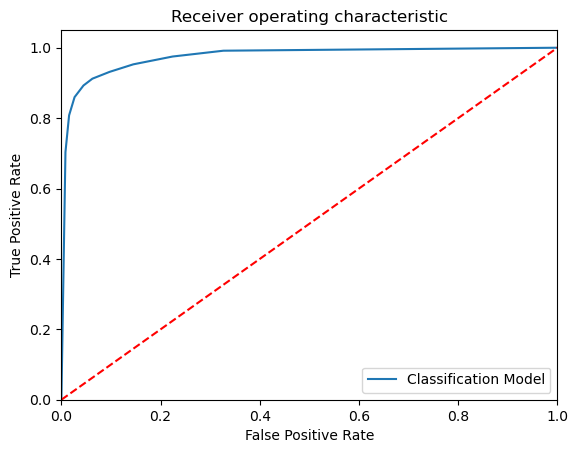

In [56]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    #KNN_Results = KNN_Results._append(new_row, ignore_index=True)
    #------KNN_Results




In [39]:
KNN_Results.head(10)

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,True_Positive,False_Negative,False_Positive,True_Negative
0,KNeighborsClassifier(n_neighbors=1),1,0.923,0.918,0.930,0.924,0.916,0.846,0.922847,0.923,2305.0,174.0,206.0,2243.0
1,KNeighborsClassifier(n_neighbors=2),2,0.928,0.961,0.892,0.926,0.964,0.858,0.927977,0.928,2212.0,267.0,89.0,2360.0
2,KNeighborsClassifier(n_neighbors=3),3,0.928,0.930,0.926,0.928,0.929,0.855,0.927568,0.928,2295.0,184.0,173.0,2276.0
3,KNeighborsClassifier(n_neighbors=4),4,0.927,0.953,0.899,0.925,0.955,0.855,0.927118,0.927,2229.0,250.0,110.0,2339.0
4,KNeighborsClassifier(),5,0.925,0.931,0.920,0.925,0.931,0.851,0.925359,0.926,2280.0,199.0,169.0,2280.0
5,KNeighborsClassifier(n_neighbors=6),6,0.925,0.946,0.902,0.924,0.948,0.851,0.925059,0.925,2236.0,243.0,127.0,2322.0
6,KNeighborsClassifier(n_neighbors=7),7,0.927,0.935,0.918,0.927,0.935,0.854,0.926798,0.927,2276.0,203.0,158.0,2291.0
7,KNeighborsClassifier(n_neighbors=8),8,0.925,0.946,0.903,0.924,0.948,0.851,0.925259,0.926,2238.0,241.0,128.0,2321.0
8,KNeighborsClassifier(n_neighbors=9),9,0.925,0.937,0.912,0.924,0.938,0.850,0.924793,0.925,2261.0,218.0,153.0,2296.0


# DECISION TREE CLASSIFIER

In [47]:
#to build 'Decission Tree' model with random sampling
from sklearn.tree import DecisionTreeClassifier
#create an object
ModelDT=DecisionTreeClassifier()
#train the model
ModelDT.fit(x_train, y_train)

# Predict the model with test data

y_pred1 = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

Confusion matrix : 
 [[2180  299]
 [  66 2383]]
Outcome values : 
 2180 299 66 2383
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.88      0.92      2479
           0       0.89      0.97      0.93      2449

    accuracy                           0.93      4928
   macro avg       0.93      0.93      0.93      4928
weighted avg       0.93      0.93      0.93      4928

Accuracy : 92.6 %
Precision : 97.1 %
Recall : 87.9 %
F1 Score : 0.923
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 92.6 %
MCC : 0.856
roc_auc_score: 0.926


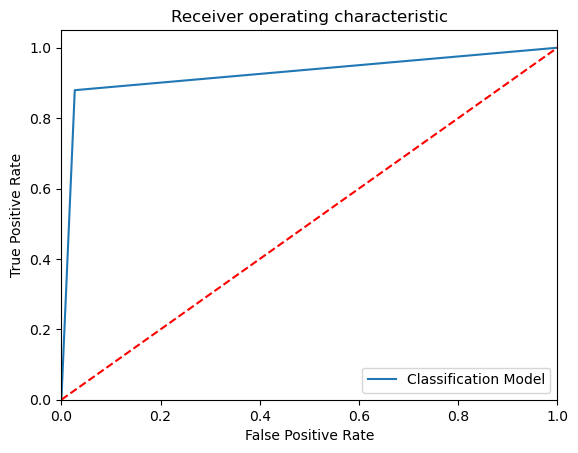

-----------------------------------------------------------------------------------------------------


In [48]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred1

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

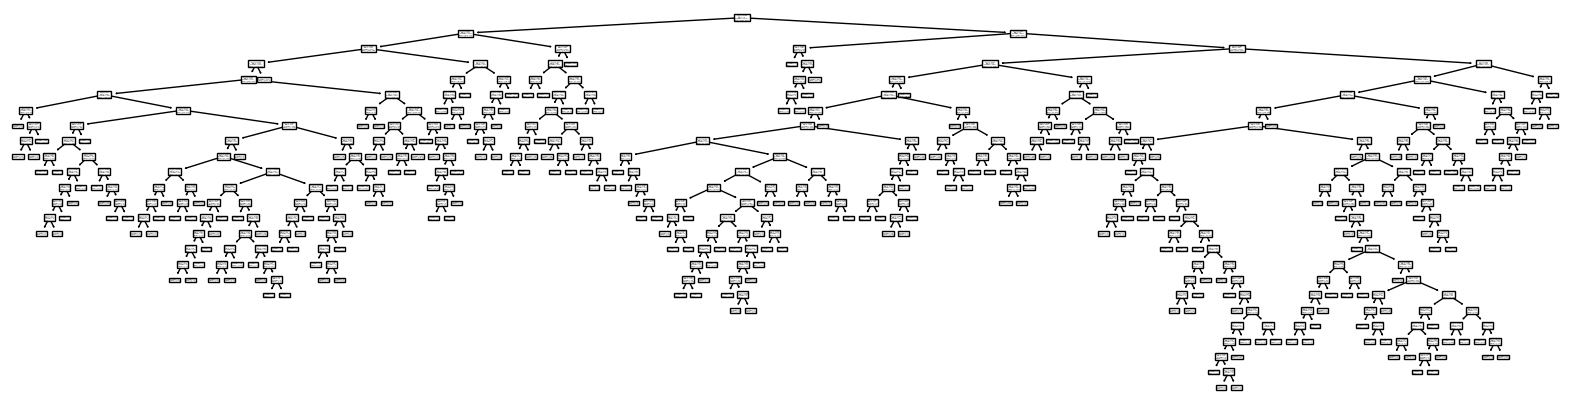

In [49]:
#plot the decission tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);

# RANDOM FOREST CLASSIFIER

In [50]:
#to build 'Random Forest' model with random sampling
from sklearn.ensemble import RandomForestClassifier
#create an object
ModelRFR=RandomForestClassifier()
#train the model
ModelRFR.fit(x_train, y_train)

# Predict the model with test data

y_pred2 = ModelRFR.predict(x_test)
y_pred_prob = ModelRFR.predict_proba(x_test)



Confusion matrix : 
 [[2376  103]
 [  58 2391]]
Outcome values : 
 2376 103 58 2391
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97      2479
           0       0.96      0.98      0.97      2449

    accuracy                           0.97      4928
   macro avg       0.97      0.97      0.97      4928
weighted avg       0.97      0.97      0.97      4928

Accuracy : 96.7 %
Precision : 97.6 %
Recall : 95.8 %
F1 Score : 0.967
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 96.7 %
MCC : 0.935
roc_auc_score: 0.967


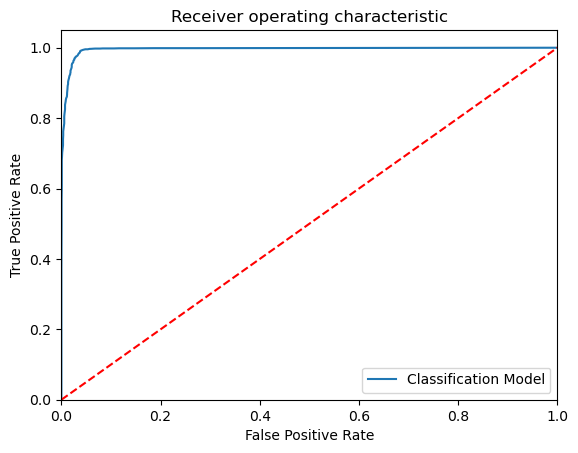

-----------------------------------------------------------------------------------------------------


In [51]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred2

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRFR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# EXTRA TREES CLASSIFIER

In [52]:
#to build 'Extra Tree Classifier' model with random sampling
from sklearn.ensemble import ExtraTreesClassifier
#create an object
ModelET=ExtraTreesClassifier()
#train the model
ModelET.fit(x_train, y_train)

# Predict the model with test data

y_pred3 = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

Confusion matrix : 
 [[2378  101]
 [  62 2387]]
Outcome values : 
 2378 101 62 2387
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.96      0.97      2479
           0       0.96      0.97      0.97      2449

    accuracy                           0.97      4928
   macro avg       0.97      0.97      0.97      4928
weighted avg       0.97      0.97      0.97      4928

Accuracy : 96.7 %
Precision : 97.5 %
Recall : 95.9 %
F1 Score : 0.967
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 96.7 %
MCC : 0.934
roc_auc_score: 0.967


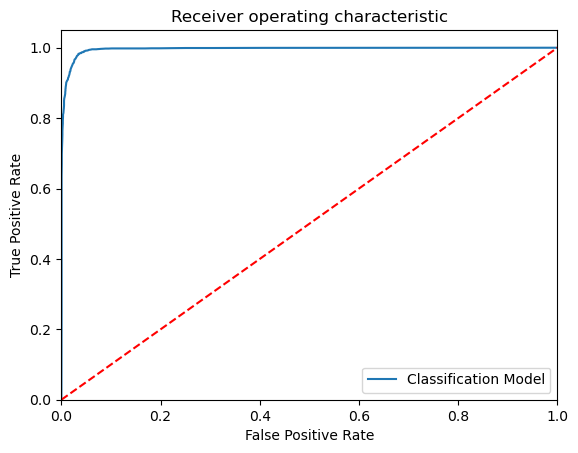

-----------------------------------------------------------------------------------------------------


In [53]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred3

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# SVM CLASSIFIER

Model Name:  SVM - Linear
Confusion matrix : 
 [[1531  948]
 [ 226 2223]]
Outcome values : 
 1531 948 226 2223
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.62      0.72      2479
           0       0.70      0.91      0.79      2449

    accuracy                           0.76      4928
   macro avg       0.79      0.76      0.76      4928
weighted avg       0.79      0.76      0.76      4928

Accuracy : 76.2 %
Precision : 87.1 %
Recall : 61.8 %
F1 Score : 0.723
Specificity or True Negative Rate : 90.8 %
Balanced Accuracy : 76.3 %
MCC : 0.548
roc_auc_score: 0.763


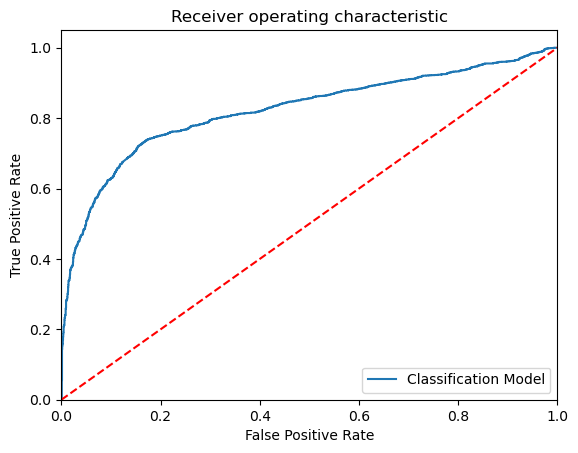

-----------------------------------------------------------------------------------------------------


In [54]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred4 = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred4

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
#EMResults1 = EMResults1._append(new_row, ignore_index=True)
#------------------------------------

# Proceeding with Random Forest Classifier

<Axes: xlabel='type', ylabel='count'>

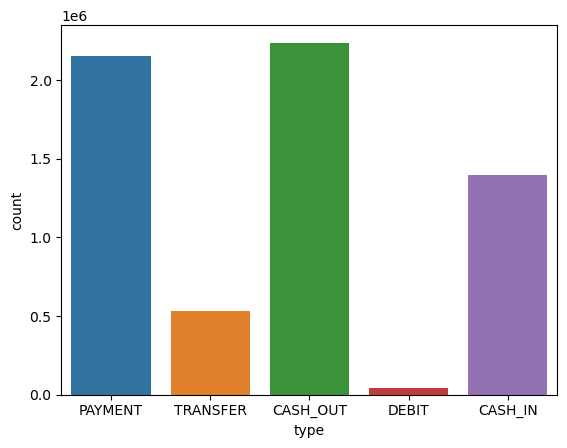

In [62]:
sns.countplot(x=F_Detection_BK['type'])

<Axes: xlabel='step', ylabel='count'>

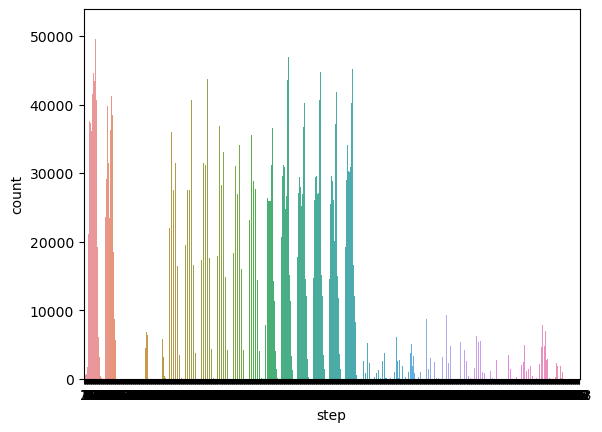

In [63]:
sns.countplot(x=F_Detection_BK['step'])

In [55]:
Results = pd.DataFrame({ 'isFraud_P':y_pred2})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = under_sample_BK2.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFraud_P
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0,1
2302,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.0,235238.66,1,0,0
4694,4,CASH_OUT,13707.11,C556223230,13707.11,0.0,C2094777811,0.0,13707.11,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,1
4776,4,CASH_OUT,86070.17,C1699873763,86070.17,0.0,C560041895,0.0,86070.17,1,0,0
